1. Import libraries

In [1]:
import sys
sys.path.append('../')
import utils as ul
import numpy as np
import librosa
import matplotlib.pyplot as plt

2. Define analysis parameters

In [2]:
fs=16000
win_dur = 40e-3
hop_dur = 10e-3
win_size = int(np.ceil(win_dur*fs))
hop_size = int(np.ceil(hop_dur*fs))
n_fft = int(2**(np.ceil(np.log2(win_size))))

3. Load audio, extract onset activations, pitch contour and spectrogram

In [8]:
x_mix,_ = librosa.load('.audios/1/mix.wav', sr=fs)
x_voc,_ = librosa.load('.audios/1/voc.wav', sr=fs)
odf_voc,_ = ul.getODF(audio = x_voc, fs = fs, winSize = win_size, hopSize = hop_size, nFFT = n_fft, source='vocal')
pitch, time = ul.pitchContour(audio=x_voc, sr=fs, minPitch=98, maxPitch=300)
f,t,X = ul.spectrogram(audio=x_voc, sr=fs, winSize=win_size, hopSize=hop_size, nFFT=n_fft)

4. Plot all of them in subplots

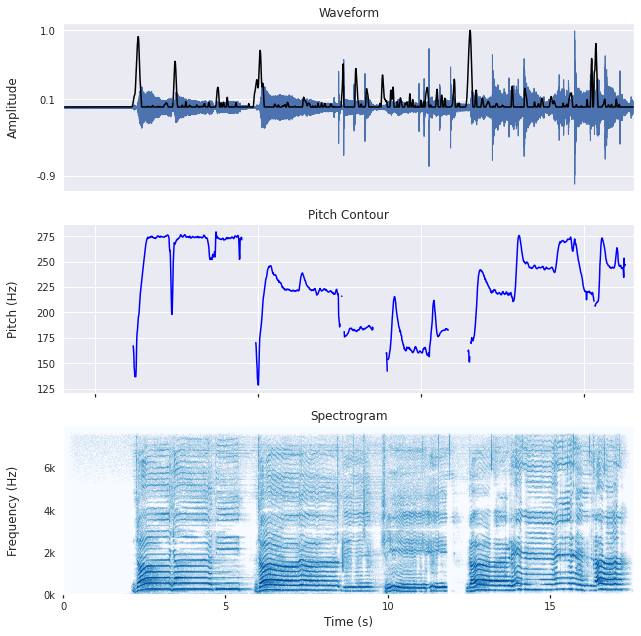

In [16]:
n_subplots=3
fig, ax = ul.generateFig(n_subplots,(9,9),[1/n_subplots]*n_subplots)

ul.drawWave(audio=x_mix, ax=ax[0])
ul.plotODF(odf=odf_voc, sr=fs, hopSize_odf=hop_size, ax=ax[0], updatePlot=True)
ul.plotPitch(pitch, time, ax=ax[1])
ul.plotSpectrogram(X,t,f,ax=ax[2],annotate=False, xticks=True, xlabel=True)

for ax_i in ax:
    ax_i.yaxis.set_label_coords(-0.075,0.5)
plt.tight_layout()